## Working with OLC in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/11_olc.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/11_olc.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/11_olc.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/11_olc.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [ ]:
# %pip install vgrid --upgrade

### latlon2olc

In [ ]:
from vgrid.conversion.latlon2dggs import latlon2olc

lat = 10.775276
lon = 106.706797
res = 8
olc_id = latlon2olc(lat, lon, res)
olc_id

'7P28QPG4+'

### OLC to Polygon

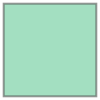

In [ ]:
from vgrid.conversion.dggs2geo.olc2geo  import olc2geo

olc_geo = olc2geo(olc_id)
olc_geo

### OLC to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.olc2geo import olc2geojson

olc_geojson = olc2geojson(olc_id)
# olc_geojson

### Vector to OLC

Processing features: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


<Axes: >

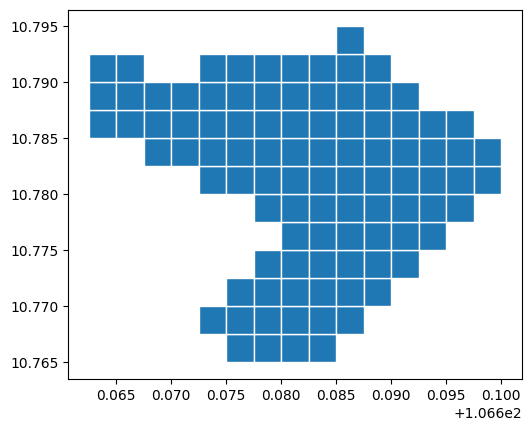

In [2]:
from vgrid.conversion.vector2dggs.vector2olc import vector2olc

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
)
vector_to_olc = vector2olc(file_path, resolution=8, compact=True, topology = True,
                            predicate = "intersects",output_format="gpd")
# Visualize the output
vector_to_olc.plot(edgecolor="white")

### OLC Compact

<Axes: >

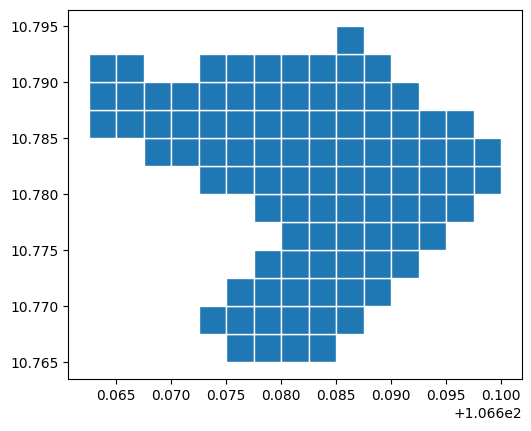

In [6]:
from vgrid.conversion.dggscompact.olccompact import olccompact

olc_compacted = olccompact(vector_to_olc, olc_id="olc", output_format="gpd")
olc_compacted.plot(edgecolor="white")

### OLC Expand

<Axes: >

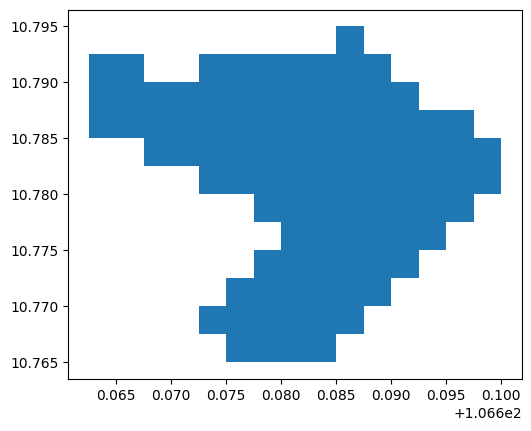

In [7]:
from vgrid.conversion.dggscompact.olccompact import olcexpand

olc_expanded = olcexpand(vector_to_olc, resolution=10, output_format="gpd")
olc_expanded.plot()

### OLC Binning

<Axes: >

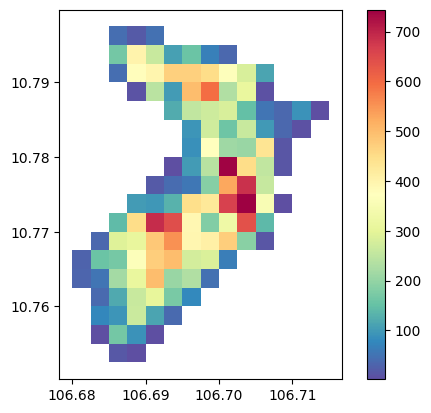

In [ ]:
from vgrid.binning.olcbin import olcbin
import geopandas as gpd
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
olc_bin =  olcbin(file_path, resolution=8, stats=stats, 
                # numeric_field="confidence",
                # category="category",
                output_format="gpd")
olc_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)   

### Raster to OLC

#### Download and open raster

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 147, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.6640125000199077e-06, 0.0, 106.708118755,
       0.0, -2.6640136054383103e-06, 10.812568272)}


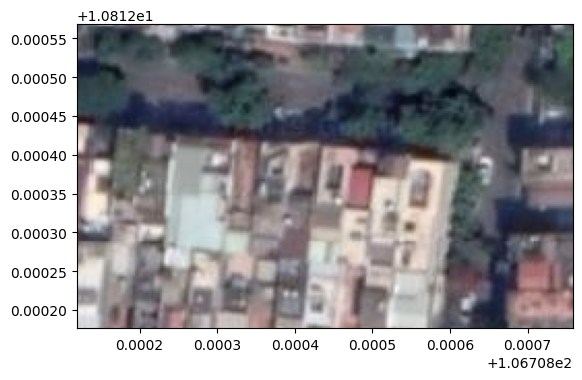

<Axes: >

In [ ]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, 'r')
print(src.meta)
show(src)

#### Convert raster to OLC

In [ ]:
# %pip install folium

In [ ]:
from vgrid.conversion.raster2dggs.raster2olc    import raster2olc

raster_to_olc =  raster2olc(raster_file, output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

olc_layer = folium.GeoJson(
    raster_to_olc,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["olc", "band_1", "band_2", "band_3"],
        aliases=["OLC ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(olc_layer.get_bounds())

# Display the map
m

Cell size: 0.08638527081938627 m2
Nearest olc resolution determined: 12


Converting raster to OLC: 100%|██████████| 6478/6478 [00:01<00:00, 5111.77 cells/s]


### OLC Generator

Generating OLC DGGS: 100%|██████████| 64800/64800 [00:06<00:00, 9444.80 cells/s] 


<Axes: >

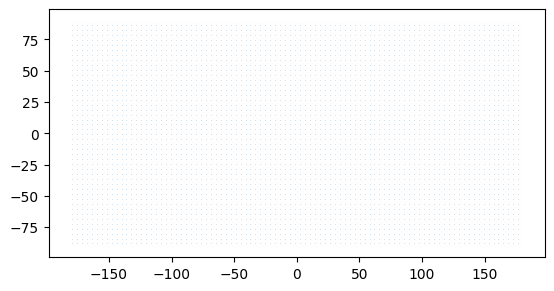

In [6]:
from vgrid.generator.olcgrid import olcgrid
olc_grid = olcgrid(resolution=4,output_format="gpd")
# olc_grid = olcgrid(resolution=8,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
olc_grid.plot(edgecolor="white")

### OLC Inspect

In [1]:
from vgrid.stats.olcstats import olcinspect 
resolution = 4
olc_inspect = olcinspect(resolution)    
olc_inspect.head()

Generating OLC DGGS: 100%|██████████| 64800/64800 [00:07<00:00, 8186.32 cells/s] 


olc  resolution  center_lat  center_lon  cell_width    cell_height  \
0  22220000+           4       -89.5      -179.5         0.0  111693.864914   
1  22230000+           4       -89.5      -178.5         0.0  111693.864914   
2  22240000+           4       -89.5      -177.5         0.0  111693.864914   
3  22250000+           4       -89.5      -176.5         0.0  111693.864914   
4  22260000+           4       -89.5      -175.5         0.0  111693.864914   

      cell_area  cell_perimeter  \
0  1.088612e+08   225337.031822   
1  1.088612e+08   225337.031822   
2  1.088612e+08   225337.031822   
3  1.088612e+08   225337.031822   
4  1.088612e+08   225337.031822   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 -90, -180 -89, -179 -89, -179 -...    False    0.01383   
1  POLYGON ((-179 -90, -179 -89, -178 -89, -178 -...    False    0.01383   
2  POLYGON ((-178 -90, -178 -89, -177 -89, -177 -...    False    0.01383   
3  POLYGON ((-177 -90, -177 -89, -176 -89, -176 -...    False    0.01383   
4  POLYGON ((-176 -90, -176 -89, -175 -89, -175 -...    False    0.01383   

        ipq       zsc  cvh  
0  0.026941  0.164138  1.0  
1  0.026941  0.164138  1.0  
2  0.026941  0.164138  1.0  
3  0.026941  0.164138  1.0  
4  0.026941  0.164138  1.0

### OLC Normalized Area Histogram

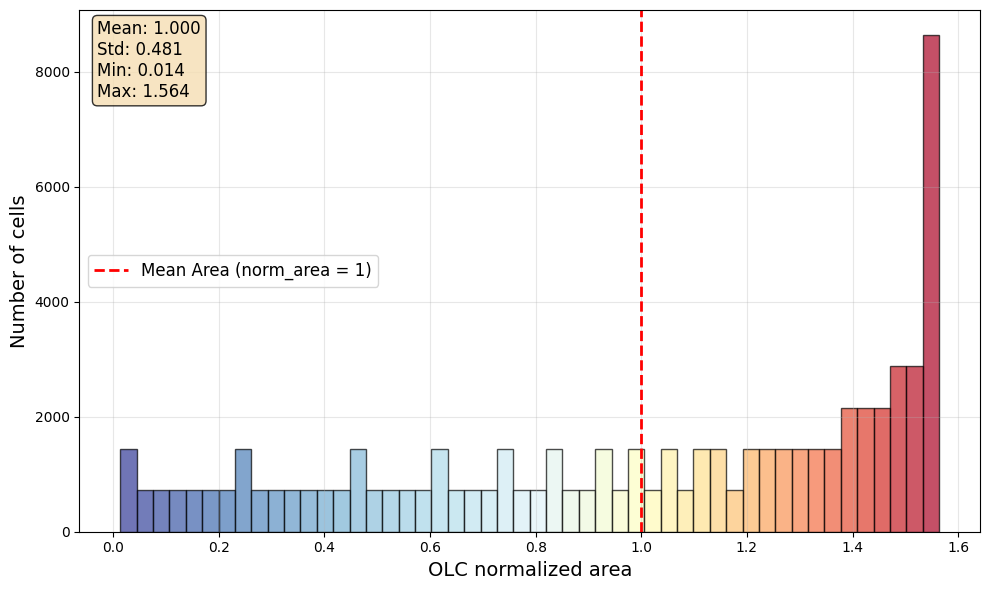

In [2]:
from vgrid.stats.olcstats import olc_norm_area_hist
olc_norm_area_hist(olc_inspect)

### Distribution of OLC Area Distortions

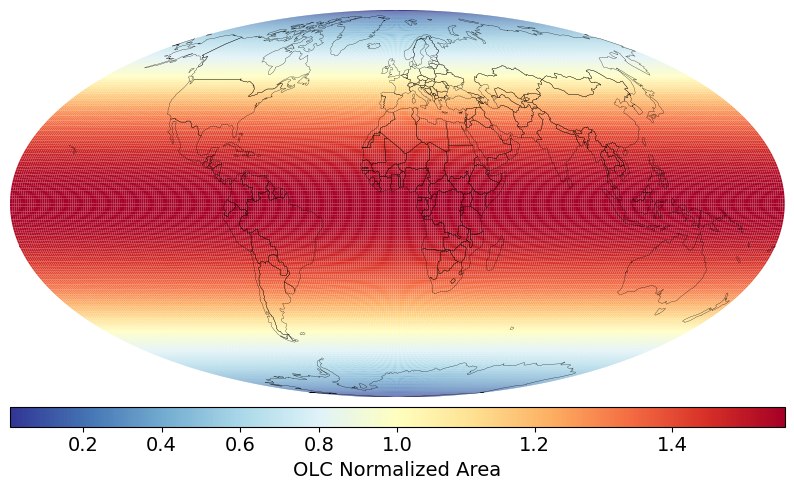

In [3]:
from vgrid.stats.olcstats import olc_norm_area
olc_norm_area(olc_inspect)

### OLC IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

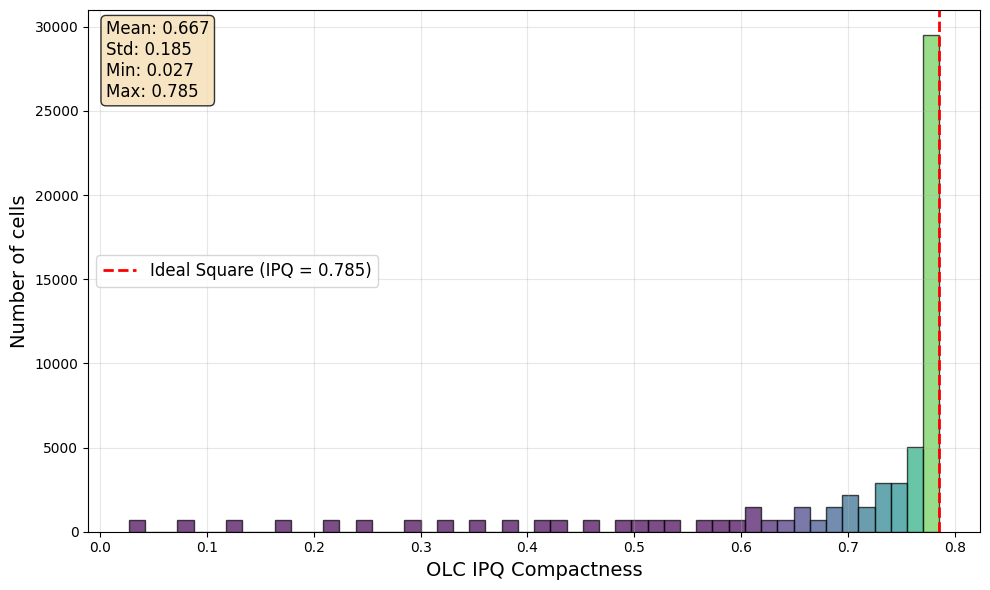

In [4]:
from vgrid.stats.olcstats import olc_compactness_ipq_hist
olc_compactness_ipq_hist(olc_inspect)

### Distribution of OLC IPQ Compactness

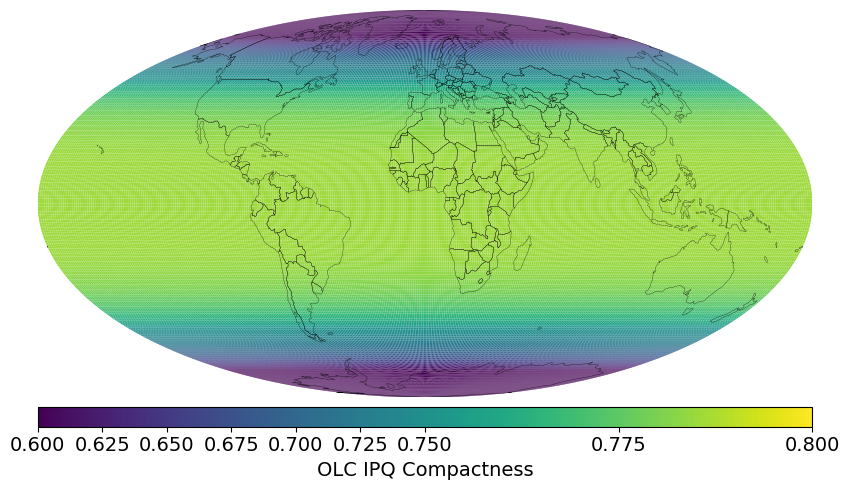

In [5]:
from vgrid.stats.olcstats import olc_compactness_ipq
olc_compactness_ipq(olc_inspect)

### OLC Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

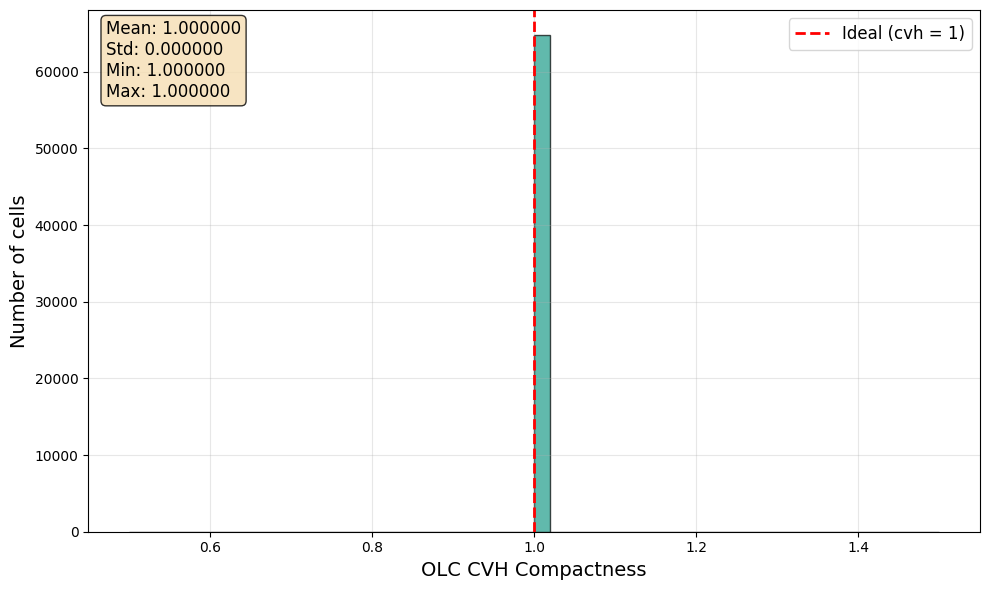

In [6]:
from vgrid.stats.olcstats import olc_compactness_cvh_hist
olc_compactness_cvh_hist(olc_inspect)

### Distribution of OLC Convex hull Compactness

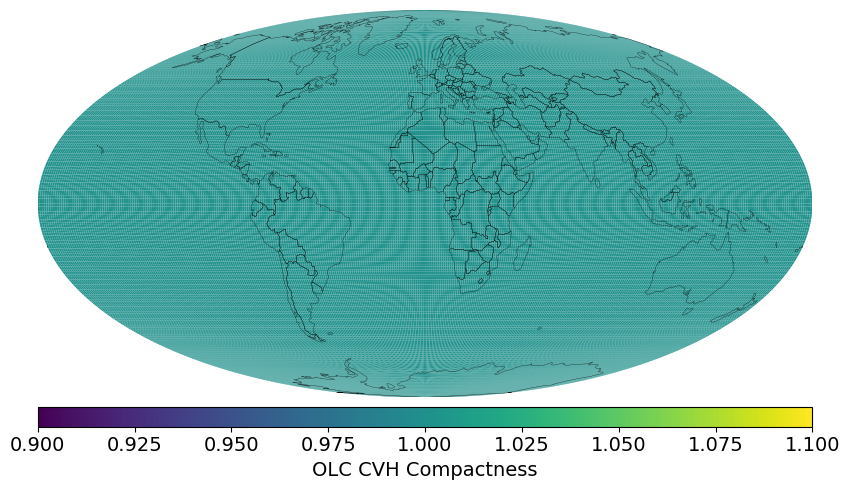

In [ ]:
from vgrid.stats.olcstats import olc_compactness_cvh
olc_compactness_cvh(olc_inspect)

### OLC Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [3]:
from vgrid.stats import olcstats
olcstats()

resolution       number_of_cells  avg_edge_len_m  avg_cell_area_m2  \
0           2                   162    1.774416e+06      3.148553e+12   
1           4                 64800    8.872082e+04      7.871383e+09   
2           6              25920000    4.436041e+03      1.967846e+07   
3           8           10368000000    2.218020e+02      4.919614e+04   
4          10         4147200000000    1.109010e+01      1.229904e+02   
5          11        82944000000000    2.479822e+00      6.149518e+00   
6          12      1658880000000000    5.545051e-01      3.074759e-01   
7          13     33177600000000000    1.239911e-01      1.537380e-02   
8          14    663552000000000000    2.772525e-02      7.686898e-04   
9          15  13271040000000000000    6.199555e-03      3.843449e-05   

          cls_m  
0  2.004280e+06  
1  1.001110e+05  
2  5.005536e+03  
3  2.502768e+02  
4  1.251384e+01  
5  2.798180e+00  
6  6.256920e-01  
7  1.399090e-01  
8  3.128460e-02  
9  6.995449e-03